# Simple MNIST convnet
by uramoon@kw.ac.kr

원본 출처<br>
**Author:** [fchollet](https://twitter.com/fchollet) (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

단순한 CNN을 사용해도 99% 이상의 테스트 정확도를 달성할 수 있습니다. CNN이 우리가 직접 그린 그림도 잘 예측할까요?

상단 메뉴 런타임 - 런타임 유형 변경에서 **GPU**를 선택하고 진행하세요.

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## TODO 1: Feature scaling

In [11]:
# Model / data parameters
num_classes = 10            # 레이블의 개수 (0, 1, 2, ..., 9, 10개)
input_shape = (28, 28, 1)   # CNN은 2차원 정보를 활용합니다. (28 x 28 흑백 이미지 한 장, 기존 MLP는 784개 픽셀의 명암을 사용)

# the data, split between train and test sets
# X를 이미지, y를 이미지에 대한 레이블로 표현합니다.
# X_train[0]은 첫 번째 훈련 그림, y_train[0]은 첫 번째 훈련 그림의 정답 ([0, 9]에 속한 숫자 하나)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 각 픽셀 값을 [0, 255] -> [0, 1]로 변환하세요.
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

## TODO 2: Input shape

In [13]:
# 훈련용 이미지의 shape을 출력하세요. (6만장의 28 x 28 이미지)
trimage = X_train.shape
print(trimage)

(60000, 28, 28)


## TODO 3: Shape expanding

In [14]:
# Make sure images have shape (28, 28, 1)
# CNN은 한 장의 이미지 모양을 (가로, 세로, 채널 수)로 만들어야 합니다.
# 컬러 이미지는 R, G, B 세 장의 채널이지만 MNIST는 흑백이라 한 장의 채널이 필요합니다.
# 최종적으로 6만장의 28 x 28 이미지 흑백 채널 하나가 필요합니다.
# 가장 마지막 자리에 차원 하나 늘리기: (60000, 28, 28) -> (60000, 28, 28, 1),
# 차원 늘리기 대신 reshape 함수도 사용 가능

# expand_dims는 NumPy 배열의 특정 위치에 차원을 늘려줍니다.
# 파이썬에서 인덱싱할 때 가장 마지막 위치를 나타내는 (음의) 정수를 기입하세요.
X_train = np.expand_dims(X_train, axis=-1 )
X_test = np.expand_dims(X_test, axis=-1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [36]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),  # Dropout 추가

        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

##TODO 4: Model training

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 128
epochs = 10000

model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# TODO: 자유롭게 설정하세요.
# https://keras.io/api/callbacks/early_stopping/
es = EarlyStopping(monitor="val_accuracy", patience=10,min_delta=0.001, restore_best_weights=True)

# 훈련 데이터의 20%는 사용하지 않고 남겨두었다가 Epoch이 끝날 때마다 남겨둔 데이터로 성능을 평가하여 출력해보세요.
# 따로 테스트를 하지 않더라도 테스트 했을 때의 성능을 짐작할 수 있게 도와줍니다.
# Hint: https://keras.io/api/models/model_training_apis/ 에서 fit method 참조
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=es, validation_split=0.2)

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7981 - loss: 0.6136 - val_accuracy: 0.9701 - val_loss: 0.1001
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9770 - loss: 0.0731 - val_accuracy: 0.9889 - val_loss: 0.0376
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9912 - val_loss: 0.0338
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9933 - val_loss: 0.0274
Epoch 5/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9894 - loss: 0.0354 - val_accuracy: 0.9923 - val_loss: 0.0269
Epoch 6/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9927 - val_loss: 0.0256
Epoch 7/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0286 - val_accuracy: 0.9929 - val_loss: 0.0241
Epoch 8/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9920 

## Evaluate the trained model

Test 정확도가 99% 미만이면 TODO4부터 다시 수행하세요.

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.018205642700195312
Test accuracy: 0.9950000047683716


## 우리가 만든 테스트 데이터 읽어오기
좌측 파일 메뉴를 활용하여 our_test_images_2024.npy, our_test_labels_2024.npy 파일을 Colab에 업로드하세요. 과거 광운대학교와 42 Seoul 수강생들이 만든 자료입니다. 나중에 여러분들이 그린 그림도 추가됩니다.


In [42]:
our_test_images = np.load('our_test_images_2024.npy')
our_test_labels = np.load('our_test_labels_2024.npy')

잘 읽어왔는지 9장을 무작위로 그려봅니다.

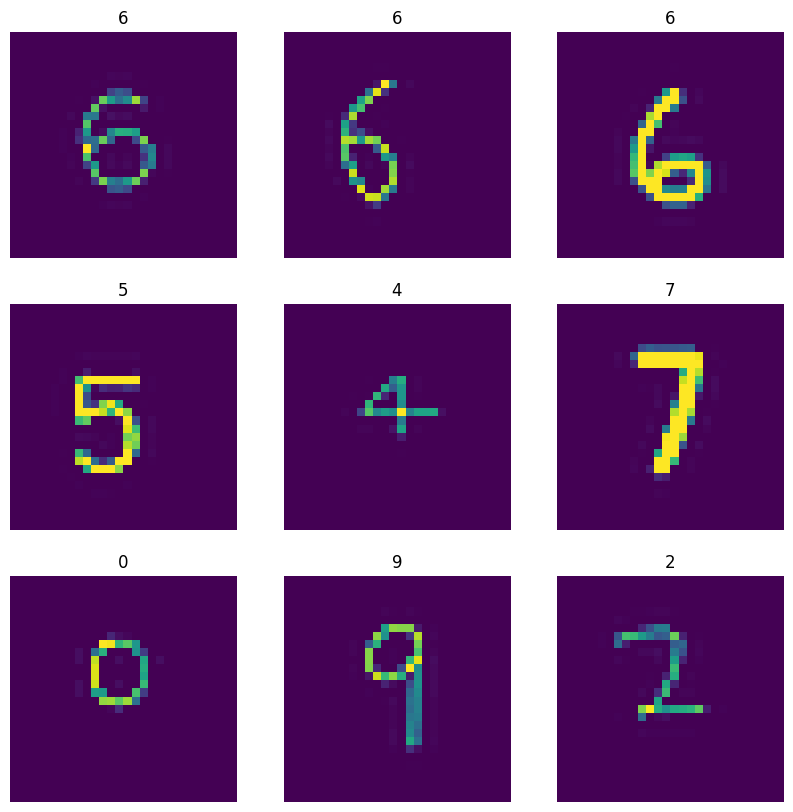

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  rand = random.randint(0, len(our_test_images) - 1)
  plt.imshow(our_test_images[rand].reshape(28, 28))
  plt.title(our_test_labels[rand])
  plt.axis("off")

## TODO5: 테스트 이미지 모양 변환

In [44]:
# TODO: 현재 our_test_images의 모양을 출력해봅시다.
print(our_test_images.shape)

(200, 784)


In [46]:
# TODO: 우리가 만든 모델의 입력층에 들어갈 수 있도록 our_test_images 모양을 바꿔봅시다.
# Hint: reshape 함수를 사용하면 쉽습니다.
our_test_images = our_test_images.reshape(our_test_images.shape[0], 28, 28, 1).astype("float32") / 255

## TODO 6: 우리가 만든 테스트 데이터로 모델 평가
evaluate 함수를 사용합니다. 예측이 잘 되나요?<br>
다음 시간에 이 문제를 해결할 것입니다.

In [47]:
score = model.evaluate(our_test_images, our_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.3848960399627686
Test accuracy: 0.10000000149011612
